## Named Entity Recognition: test of the model

This is the test with the model chosen for analyis - xlm-roberta-large-ner-hrl model, henceforth Model that was chosen as a suitable candidate for the NER task on Latvian corpus. 
Model is specifically meant to be NER model for 10 high resource languages, including Latvian, and is based on fine-tuned XLM-RoBERTa large model, trained to extract three entity types - locations, organizations and persons.
See reference for the link and initial source code of the Model.


Further comments:
1) Conceptually, the code used in this file for the most part served to prepare for main experiments demonstrated in "2_NER_with_xlmroberta.ipynb". Similary, several preparatory steps, e.g. files used in this file have been created here.
2) The code has not been cleaned. It demonstrates the consecutive and iterative steps taken by student. Due to time constraints, repeated imports of libraries, import of libraries ultimately not used and other redundancies either are plentiful or occassional. 
3) The experiments for corpus analysis relies on course materials prepared by Gints Jēkabsons, Riga Techinal University (see reference).
4) In the project, two AI tools have been used as assistants in the developing of the code: Chat GPT-3.5 by OpenAI (ChatGPT 3.5., 2022) was helpful for debugging and overcoming several deadlocks, but GitHub Copilot’s (GitHub Copilot, 2021) chief role was completion of some code lines and non-crucial commenting for time-saving. As it happens with AI tools, the assistance was influenced by prompts, comments and feedback, and output was further edited. For the purposes of academic integrity, it is important to state that such assistance on specific occassions was substantial. 

In [ ]:
#first, however, a virtual environment must be created
#for this, a new directory will be made, and the virtual environment will be created in this directory
# mkdir command is used for this, with the directory name added to the relevant path
# virtual environement will be created in this new directory using the command python3 -m venv

In [1]:
! pip install transformers sentencepiece protobuf

Defaulting to user installation because normal site-packages is not writeable


In [1]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline
tokenizer = AutoTokenizer.from_pretrained("Davlan/xlm-roberta-large-ner-hrl")
model = AutoModelForTokenClassification.from_pretrained("Davlan/xlm-roberta-large-ner-hrl") # the model is loaded. Warning: it is over 2GB large
nlp = pipeline("ner", model=model, tokenizer=tokenizer, aggregation_strategy="first") # the pipeline is created


c:\Program Files\Python312\Lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
c:\Program Files\Python312\Lib\site-packages\transformers\utils\generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
c:\Program Files\Python312\Lib\site-packages\transformers\utils\generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


For the test, the very first diary from the corpus was chosen. It is suitable candidate due to its average lenght, laconic and relatively clear writing style that holds diverse information with usually clearly distinguishable entities. Significantly, Model was tested on unpreprocessed document.  

In [2]:
# Test with an example text from corpus

file_path = r"C:\Users\papel\GitHub_Projects\NER-for-Autobiography-collection\Data\Data\Corpus\1115688_Karla-Valguma-dienasgramatas.txt"
with open(file_path, "r", encoding="utf-8") as file:
    example_text = file.read()

ner_results = nlp(example_text)

for entity in ner_results:
    print(ner_results)
    

[{'entity_group': 'PER', 'score': 0.99998176, 'word': 'Ilonu', 'start': 56, 'end': 62}, {'entity_group': 'PER', 'score': 0.9999753, 'word': 'Ilonai', 'start': 357, 'end': 364}, {'entity_group': 'PER', 'score': 0.99998426, 'word': 'Ilona', 'start': 754, 'end': 760}, {'entity_group': 'LOC', 'score': 0.9994635, 'word': 'Alsviķi', 'start': 775, 'end': 783}, {'entity_group': 'PER', 'score': 0.9995772, 'word': 'Pēteris', 'start': 936, 'end': 944}, {'entity_group': 'PER', 'score': 0.9915124, 'word': 'IsmaeļaElla', 'start': 986, 'end': 999}, {'entity_group': 'PER', 'score': 0.999987, 'word': 'Ilona', 'start': 1132, 'end': 1138}, {'entity_group': 'PER', 'score': 0.9999888, 'word': 'Ilona', 'start': 1287, 'end': 1293}, {'entity_group': 'PER', 'score': 0.9997515, 'word': 'Alvis', 'start': 1309, 'end': 1315}, {'entity_group': 'PER', 'score': 0.99994516, 'word': 'Ligita', 'start': 1359, 'end': 1366}, {'entity_group': 'PER', 'score': 0.6259897, 'word': 'Lī', 'start': 1458, 'end': 1461}]
[{'entity_gr

C:\Users\papel\AppData\Roaming\Python\Python312\site-packages\transformers\pipelines\token_classification.py:392: UserWarning: Tokenizer does not support real words, using fallback heuristic
  warnings.warn(


In [3]:
import os

# Test with an example text from corpus
base_dir = os.path.dirname(os.path.abspath(__file__))
file_path = os.path.join(base_dir, "Data/Data/Corpus/1115688_Karla-Valguma-dienasgramatas.txt")
loc_words = []  
with open(file_path, "r", encoding="utf-8") as file:
    for line in file: # looping through the lines in the file
        line_results = nlp(line.strip())   
        for entity in line_results:  # looping through the entities in the line
            if entity["entity_group"] == "LOC":  # I'm interested only in 'LOC' tags for now
                loc_words.append(entity["word"])   


print("Words associated with 'LOC' tags:", loc_words)


Words associated with 'LOC' tags: ['Alsviķi', 'Mārkalnē', 'Kolberģi', 'PSRSKanādas', 'Krejotavā', 'Kolberģi', 'Bērziņviļņa', 'Alūksni', 'Ilonas', 'Alūksni', 'Alūksnē', 'Alūksnē', 'Alūksni', 'Alūksni', '"Kalniņos"', 'Matīsenes', 'Alūksni', 'Igaunijas', 'Alūksni', 'Alūksni', 'Ilonas', 'Francija', 'Vambolas', 'Alūksni', 'Ērģenes', 'Guntakapam', 'Kolberģi', 'Baltais', 'Vilka', 'Jaunsilenieku', 'Mžs.', 'Biruta', 'Ērģeneskapiem', 'Guntakapa', 'Valkas', 'Ērģenei', 'Apes', 'Alūksnei', 'Viļņa', 'ViļņaB.', 'Viļņa', 'Lāčudārza', 'Matīsenē', 'Rīgas', 'Rīgā', 'Talsu', 'Talsiem', 'Līvānu', 'Tukuma', 'Rīgā', 'Alūks.,', 'Cēsuceļa', 'Alūksnē', 'Alūksni', 'Liepnas', 'Tarvās', 'Rīgas', 'Mālupes', 'USA', 'PSRS', 'Viļņa', 'Alūksni', 'Alūksnē', 'Kolberģi', 'Alūksni', 'Alūksni', 'Rīgu.', 'Rīgu', 'Alūksnē', '"Bērnu', 'Francija', 'PSRS', 'Laipnekalna', 'Gaiziņkalnā', 'Otesdzirnavām', 'Brenciem', 'Vīksnas', 'Viļņa', 'Alūksnē', 'Alūksnē', 'Somija', 'Alūksnē"Ezermalā",', 'Saks', 'spaini', 'Alūksni', 'Balviem', 'M

The locations extracted are good candidates, for the most part. However, there are mistakes too and even wrongly labeled entities (technically, entity groups but from here on they will be referred to as entities). The reason for this lies in the aggregation strategy selected, which is "max". The first experiment involved comparing all five strategies available and choosing the best candidate that could be applied on the corpus.

In [10]:
import pandas as pd

# Defining the NER pipelines with different aggregation strategies mentioned in the documentation
# strategy "none" was not included as unnecessary for this task
pipelines = {
    "simple": pipeline("ner", model=model, tokenizer=tokenizer, aggregation_strategy="simple"),
    "first": pipeline("ner", model=model, tokenizer=tokenizer, aggregation_strategy="first"),
    "average": pipeline("ner", model=model, tokenizer=tokenizer, aggregation_strategy="average"),
    "max": pipeline("ner", model=model, tokenizer=tokenizer, aggregation_strategy="max")
}

# same test file as above
# base_dir = os.path.dirname(os.path.abspath(__file__))
# file_path = os.path.join(base_dir, "Data/Data/Corpus/1115688_Karla-Valguma-dienasgramatas.txt")

# Dictionaries to store locations extracted
locations_dict = {strategy: [] for strategy in pipelines}
location_counters = {strategy: 0 for strategy in pipelines} # Counters for locations extracted

with open(file_path, "r", encoding="utf-8") as file:
    for line in file: # a bit more advanced looping than above
        for strategy, nlp_pipeline in pipelines.items():
            line_results = nlp_pipeline(line.strip())   
            for entity in line_results:  
                if "entity_group" in entity and entity["entity_group"] == "LOC":
                    locations_dict[strategy].append(entity["word"])  # Add word to the list
                    location_counters[strategy] += 1  # Increment the counter

# Finding the maximum length of the lists in locations_dict
location_length = max(len(locations) for locations in locations_dict.values())

# Padding shorter lists with None to match the maximum length
for locations in locations_dict.values():
    while len(locations) < location_length:
        locations.append(None)

# DataFrame to display the locations extracted for analysis
df = pd.DataFrame(locations_dict)

# Print the DataFrame and location counters
print("Locations extracted by each pipeline:")
print(df)
print("\nLocation Counters:")
for strategy, count in location_counters.items():
    print(f"{strategy}: {count}")

df.to_csv("test_aggr_strat.csv", encoding="utf-8", index=False) # the df is too long, so it is saved to a csv file for easier viewing

C:\Users\papel\AppData\Roaming\Python\Python312\site-packages\transformers\pipelines\token_classification.py:392: UserWarning: Tokenizer does not support real words, using fallback heuristic
  warnings.warn(


Locations extracted by each pipeline:
        simple       first     average          max
0     Kolberģi   Kolberģi.   Kolberģi.      Alsviķi
1      Alsviķi     Alsviķi     Alsviķi     Mārkalnē
2    Krejotavā  Krejotavā.  Krejotavā.     Kolberģi
3      Alūksni    Alūksni.    Alūksni.  PSRSKanādas
4        Alūks    Alūksnē.    Alūksnē.    Krejotavā
..         ...         ...         ...          ...
351     Taidēs        None        None         None
352       Poļa        None        None         None
353   Alūksnes        None        None         None
354        Kre        None        None         None
355    Alūksni        None        None         None

[356 rows x 4 columns]

Location Counters:
simple: 356
first: 323
average: 261
max: 167


PermissionError: [Errno 13] Permission denied: 'test_aggr_strat.csv'

The results indicates a significant disparity between strategies, which is another argument that justifies the experiment. An analysis of results indicates the superiority of strategy "simple" and "first". Each of them have their drawbacks. For the further work the aggregation strategy "first" will be used.

However, even this aggregation method has limitations that will have to be taken into account during the work with the corpus. Among problems are:  
*  ambiguities due to morphological richness and grammar structure of the Latvian language. E.g. mentions of person "Viļņa"/"Viļņu" are likely identified as the location due to the city with this name and the very fact that this person is the target of visits;
* unorthodox style or language use - here, the chaining of words yields both correct results (e.g. "Kūdrupē") but tend to concatenate location names even when that is not neccessary (e.g. "Jaunsileniekudzirnavas"). Abbreviations play some role too, with some of them likely asking for a closer look before correct attributions (e.g. "Mžs. Pelēcis" likely means "Mežsaimniecības Pelēcis"). On the whole, however, such entities are acceptable as candidates;
* since the unprocessed corpus is used, punctuations, which likely had a positive role in entity extraction, sometimes stay affixed to the entity. While this could be beneficial in some cases, this will be fixed at later stages of the project. 
*  Model's behavior, that cannot be explained without deeper analysis. Here, the person's names "Ilona" and "Vilnis" (in various morphological forms and not only - this person exists also as "Vilnis B", for example) can be mention as the example of often-mislabeled entity. There also are locations that likely should be labeled as organizations ("Literatūras un mākslas muzejā") or whose interpretation would depend upon strict entity definitions.
* ortographic mistakas in location names are not a major problem. The few that exist could be both because of mistakes by the author and transcriber. Lookup at the source would be neccessary in such cases.

The total number of location entities in the file indicate the importance of this type of entity for the author. This variable will be used to identify the role of spatiality in the corpus in comparison to other entities.
The further tactic will be extraction of all type of entities for the test file.

In [13]:
from transformers import pipeline
import pandas as pd

# Initialize the NER pipeline
pipeline_first = pipeline("ner", model=model, tokenizer=tokenizer, aggregation_strategy="first")

# same test file as above
# base_dir = os.path.dirname(os.path.abspath(__file__))
# file_path = os.path.join(base_dir, "Data/Data/Corpus/1115688_Karla-Valguma-dienasgramatas.txt")


# Defining entity types and counters
entities_dict = {entity_type: [] for entity_type in ["LOC", "PER", "ORG"]}
entity_counters = {entity_type: 0 for entity_type in entities_dict}

# Reading the text file
with open(file_path, "r", encoding="utf-8") as file:
    text_lines = file.readlines()

# Processing each line of the text. NB! The code in final experiments was different
colored_lines = []
for line in text_lines:
    line_results = pipeline_first(line.strip())
    colored_line = line
    for entity in line_results:
        if "entity_group" in entity and entity["entity_group"] in entities_dict:
            start_idx = entity["start"]
            end_idx = entity["end"]
            entity_type = entity["entity_group"]
            colored_entity = "{\\colortbl ;\\red255\\green0\\blue0;\\red0\\green255\\blue0;\\red0\\green0\\blue255;}" + \
                             "\\cf" + str(1 if entity_type == "LOC" else 2 if entity_type == "PER" else 3) + \
                             f" {entity['word']}"  
            # Replacing the entity with a colored version in the text line
            colored_line = colored_line[:start_idx] + colored_entity + colored_line[end_idx:]
            entity_counters[entity_type] += 1
    colored_lines.append(colored_line.strip())  # Appending colored line

# Saving the modified text with colored entities into a new RTF file
output_file_path = "color_test.rtf"
with open(output_file_path, "w", encoding="utf-8") as file:
    file.write("{\\rtf1\\ansi\\deff0" + "\n".join(colored_lines) + "}")

# Print entity counts
print("\nEntity Counters:")
for entity_type, count in entity_counters.items():
    print(f"{entity_type}: {count}")


Entity Counters:

LOC: 323

PER: 717

ORG: 76

This gives a comparative look at the importances of entities in the text. The lists of organizations and persons will not be analysed in detail. One apparent issue are  the group entities consisting of a toponym and an insitution or establishment, e.g. "Mālupes veikalā". The algorythm and the aggregation method selected treats some of such entities as locations, and some - as organizations. Overall, the algorithm seems to work well in providing entity candidates.

The dataframe created will be source for some preprocessing that is needed for further analysis. Extracted entities will be stemmed, unnecessary signs - removed. Goal is to gain (A.) unique instances and their count; and (B.) frequencies of the instances in the text. For this, the text also will be processed, using NLTK library with the removal of stopwords. Such frequencies wil calculated both for each lemmatized entity instance and their aggreagions. 

If first could provide the relevance of specific locations (or person names or organizations) within the text, the second form could indicate the relevance of the specific and named spatial manifestations for the author both in comparison with organizations and persons, and against other texts. Thus, the frequences could provide a way for corpus-wide comparisons and give important qualitative insights. Furthermore, it will provide an opportunity for selecting texts for the close reading.

In [72]:
import csv
import re

input_csv = "test_all_entities.csv"
output_csv = "test_all_entities_proc.csv"

# Defining a function to preprocess text
def preprocess_text(text):
    # Removing punctuation from the csv - they resulted from aggregation strategy chosen
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text.strip())
    return text

with open(input_csv, 'r', newline='', encoding='utf-8') as input_file, \
     open(output_csv, 'w', newline='', encoding='utf-8') as output_file:
    
    csv_reader = csv.reader(input_file)
    csv_writer = csv.writer(output_file)
    
    for row in csv_reader:
        processed_row = []
        column_index = 0
        for cell in row:
            processed_cell = preprocess_text(cell)
            if processed_cell:
                while len(processed_row) < column_index + 1:
                    processed_row.append('')
                processed_row[column_index] = processed_cell
            column_index += 1
        
        csv_writer.writerow(processed_row)

print("Results saved to", output_csv)


Preprocessing completed and saved to test_all_entities_proc.csv


Checking the lengths of the test file in Regular and Lemmatized Corpus.

In [15]:
from nltk.corpus import PlaintextCorpusReader
base_path = os.path.dirname(__file__)

# Define the paths relative to the script's location
corpus_root = os.path.join(base_path, "Data", "Data", "Corpus")
file_path_reg = os.path.join(base_path, "Data", "Regular_Corpus", "R_1115688_Karla-Valguma-dienasgramatas.txt")
file_path_lemm = os.path.join(base_path, "Data", "Lemmatized_Corpus", "L_1115688_Karla-Valguma-dienasgramatas.txt")

corpus_reader = PlaintextCorpusReader(corpus_root, '.*\.txt')

words_original = corpus_reader.words(file_path)
words_reg = corpus_reader.words(file_path_reg)
words_lemm = corpus_reader.words(file_path_lemm)

total_tokens_original = len(words_original)
total_tokens_reg = len(words_reg)
total_tokens_lemm = len(words_lemm)

print(f"Total tokens in original text: {total_tokens_original}")
print(f"Total tokens in regular corpus text: {total_tokens_reg}")
print(f"Total tokens in lemmatized corpus text: {total_tokens_lemm}")


Total tokens in original text: 22651
Total tokens in regular corpus text: 16469
Total tokens in lemmatized corpus text: 16550


<>:7: SyntaxWarning: invalid escape sequence '\.'
<>:7: SyntaxWarning: invalid escape sequence '\.'
C:\Users\papel\AppData\Local\Temp\ipykernel_26788\2410636569.py:7: SyntaxWarning: invalid escape sequence '\.'
  corpus_reader = PlaintextCorpusReader(corpus_root, '.*\.txt')


Preparing for the main experiments included counting tokens in the each file from the prepared corpora.

In [67]:
# import os
import pandas as pd
from nltk.corpus import PlaintextCorpusReader

def calculate_token_counts(corpus_root, corpus_reg_root, corpus_lemm_root):
    # Getting list of files in the original, regular, and lemmatized corpus directories
    original_files = os.listdir(corpus_root)
    reg_files = os.listdir(corpus_reg_root)
    lemm_files = os.listdir(corpus_lemm_root)

    # Initializing lists to store filenames and token counts
    filenames = []
    token_counts_original = []
    token_counts_reg = []
    token_counts_lemm = []

    # Iterateing through files in original corpus directory
    for orig_filename in original_files:
        # Extracting the seven-number combo from the filename
        text_number = orig_filename.split('_')[0]

        # Checking if corresponding regular and lemmatized files exist
        for reg_filename, lemm_filename in zip(reg_files, lemm_files):
            if text_number in reg_filename and text_number in lemm_filename:
                # Initializing corpus reader
                corpus_reader = PlaintextCorpusReader(corpus_root, '.*\.txt')

                # Getting tokens from original, regular, and lemmatized versions
                words_original = corpus_reader.words(os.path.join(corpus_root, orig_filename))
                words_reg = corpus_reader.words(os.path.join(corpus_reg_root, reg_filename))
                words_lemm = corpus_reader.words(os.path.join(corpus_lemm_root, lemm_filename))

                # Append filenames and token counts
                filenames.append(orig_filename)
                token_counts_original.append(len(words_original))
                token_counts_reg.append(len(words_reg))
                token_counts_lemm.append(len(words_lemm))
                break  # Stop searching once a match is found

    # Dataframe for storing results
    data = {
        'Filename': filenames,
        'Original': token_counts_original,
        'Regular': token_counts_reg,
        'Lemmatized': token_counts_lemm
    }
    df = pd.DataFrame(data)
    return df

# Example usage
base_path = os.path.dirname(__file__)

corpus_root = os.path.join(base_path, "Data", "Data", "Corpus")
corpus_reg_root = os.path.join(base_path, "Data", "Regular_Corpus")
corpus_lemm_root = os.path.join(base_path, "Data", "Lemmatized_Corpus")

token_results_df = calculate_token_counts(corpus_root, corpus_reg_root, corpus_lemm_root)
print(token_results_df)


<>:26: SyntaxWarning: invalid escape sequence '\.'
<>:26: SyntaxWarning: invalid escape sequence '\.'
C:\Users\papel\AppData\Local\Temp\ipykernel_22880\1737195871.py:26: SyntaxWarning: invalid escape sequence '\.'
  corpus_reader = PlaintextCorpusReader(corpus_root, '.*\.txt')


                                             Filename  Original  Regular  \
0            1115688_Karla-Valguma-dienasgramatas.txt     22651    16469   
1           1115696_Edgara-Reinsona-dienasgramata.txt      8006     6932   
2           1117599_Irmas-Viksninas-dienasgramata.txt     20876    16168   
3   1117599_nezinamas-rigas-skolnieces-dienasgrama...     20876    16168   
4      1117608_Dainas-Rozenblates-Atminu-zimejumi.txt     59885    49867   
..                                                ...       ...      ...   
90                   1797583_Karla-Sabaka-atminas.txt       598      506   
91  1799971_Izraksti-no-Karla-Paucisa-dienasgramat...     13107     9570   
92  1846318_Katrines-Butenieces-dienasgramata-no-1...     56857    45872   
93  1900122_Karla-Vesmana-vestules-un-Annas-Rosman...     18093    14300   
94                    1910061_Olgas-Veges-atminas.txt         4        2   

    Lemmatized  
0        16550  
1         6931  
2        16167  
3        16167  
4 

In [68]:
# Dataframe looks good, so it can be saved to CSV
token_results_df.to_csv("token_results_df.csv", index=False)

Testing out the counting of frequencies of entities against the tokens in each file.

In [76]:
import csv

base_dir = os.path.dirname(os.path.abspath(__file__))

input_csv = os.path.join(base_dir, "NER-experiments/test_all_entities_proc.csv")

def count_relative_frequencies(input_csv): # Function to count frequencies and calculate relative frequencies
    column_counts = {} # Dictionary to store valid values
    total_tokens_reg = 0
    
    with open(input_csv, 'r', newline='', encoding='utf-8') as file:
        csv_reader = csv.reader(file)
        
        header = next(csv_reader)
        
        for col in header:
            column_counts[col] = 0 # For counting the number of non-empty values in each column
        
        for row in csv_reader:
            total_tokens_reg+= 1
            for col, value in zip(header, row): # Looping through the columns and values in the row
                if value.strip(): # Checking if the value is not empty and takes off any whitespace
                    column_counts[col] += 1
    
    # Calculating relative frequencies for tokens in the regular corpus
    relative_frequencies = {col + "_freq": count / total_tokens_reg for col, count in column_counts.items()}
    
    return relative_frequencies

result = count_relative_frequencies(input_csv)

for column, relative_frequency in result.items():
    print(f"{column}: {relative_frequency:.4f}") # decided to stick with 4 decimal places


LOC_freq: 0.4505
PER_freq: 0.9986
ORG_freq: 0.1032


Testing out the visual plot of frequencies on one file.

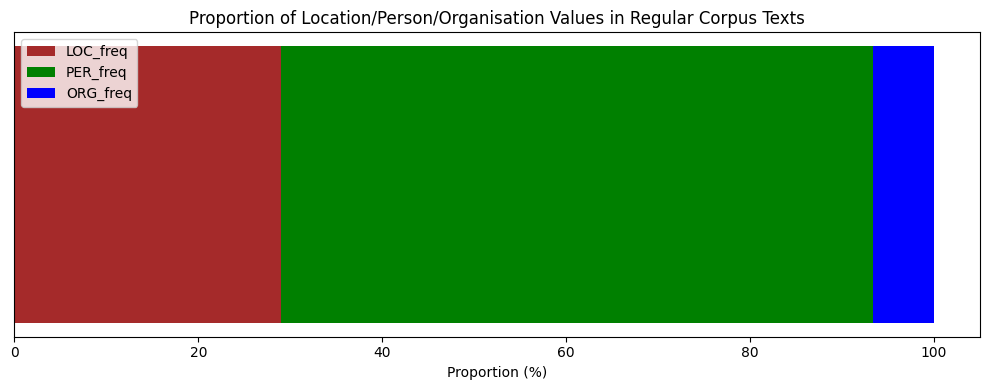

In [78]:
import matplotlib.pyplot as plt
import numpy as np

#base_dir = os.path.dirname(os.path.abspath(__file__))
#input_csv = os.path.join(base_dir, "NER-experiments/test_all_entities_proc.csv")

result = count_relative_frequencies(input_csv)


plt.figure(figsize=(10, 4))  

total_sum = sum(result.values())

filenames = list(result.keys())

colors = ['brown', 'green', 'blue']

bottom = 0  
for i, filename in enumerate(result.keys()):
    value = result[filename]
    plt.barh(0, value / total_sum * 100, left=bottom, color=colors[i], label=filename)
    bottom += np.array(value / total_sum * 100)

# Adding labels and title
plt.xlabel('Proportion (%)')
plt.yticks([])  # Hide y-axis ticks and labels
plt.title('Proportion of Location/Person/Organisation Values in Regular Corpus Texts')

# Show plot
plt.legend()
plt.tight_layout()
plt.show()


Some experiments followed on stemming tactics.

In [1]:
! pip install LatvianStemmer

Defaulting to user installation because normal site-packages is not writeable


In [6]:
import LatvianStemmer
print('Alūksne:', LatvianStemmer.stem('Alūksne'))
print('Rūjiena:', LatvianStemmer.stem('Rūjiena'))
print('Rīga:', LatvianStemmer.stem('Rīga'))
print('Kolberģi:', LatvianStemmer.stem('Kolberģi'))

Alūksne: Alūksn
Rūjiena: Rūjien
Rīga: Rīg
Kolberģi: Kolberģ


I also wanted to understand, if stemming could help to approximate the most popular entities.

In [30]:
import pandas as pd
import LatvianStemmer
import nltk

#base_dir = os.path.dirname(os.path.abspath(__file__))
#input_csv = os.path.join(base_dir, "NER-experiments/test_all_entities_proc.csv")
stemming_df = pd.read_csv(input_csv)

# Dropping rows with NaN values in the first column, because there were empty cells
stemming_df = stemming_df.dropna(subset=[df.columns[0]])

stemmed_words = []
for word in stemming_df.iloc[:, 0]:
    stemmed_word = LatvianStemmer.stem(str(word))  # Converting to string to handle potential NaN values
    stemmed_words.append(stemmed_word)

# Counting the number of stemmed units
stemmed_units_count = len(stemmed_words)

locations_stemmed = pd.DataFrame({
    'Stemmed Word': stemmed_words
})

print(locations_stemmed)
print("Number of stemmed units:", stemmed_units_count)
print("Unique stemmed units:", len(locations_stemmed['Stemmed Word'].unique()))

locations_stemmed_freq = nltk.FreqDist(stemmed_words)
locations_stemmed_freq.tabulate
for word, freq in locations_stemmed_freq.most_common():
    percentage = locations_stemmed_freq.freq(word) * 100 # we would get the same result with this as well: freq / len(words) * 100
    # \t is tabulation character, str is function for converting numbers to strings
    print(word + '\t' + str(round(percentage, 2)) + '%')


    Stemmed Word
0        Kolberģ
1         Alsviķ
2       Krejotav
3         Alūksn
4         Alūksn
..           ...
318         Taid
319          Pol
320       Alūksn
321     Krejotav
322       Alūksn

[323 rows x 1 columns]
Number of stemmed units: 323
Unique stemmed units: 118
Krejotav	19.81%
Alūksn	19.2%
Matīsen	4.95%
Rīg	4.64%
Kolberģ	4.33%
PSRS	2.17%
Tals	1.55%
Dzelzav	1.24%
Mālup	1.24%
Brenc	1.24%
Visikum	1.24%
Alsviķ	0.93%
Viln	0.93%
Mārkaln	0.62%
Ilon	0.62%
Maskav	0.62%
Francij	0.62%
Ērģeneskap	0.62%
kap	0.62%
Tarv	0.62%
Velt	0.62%
Balv	0.62%
Družb	0.62%
Norvēģij	0.62%
Bej	0.62%
Vaiņod	0.62%
Kanād	0.31%
Bērziņviln	0.31%
Kalnin	0.31%
Dain	0.31%
Igaunij	0.31%
Latvij	0.31%
Met	0.31%
Tucen	0.31%
Baltaispurv	0.31%
Vilkakakt	0.31%
Akavīn	0.31%
Jaunsileniekudzirnav	0.31%
Jaunkursīš	0.31%
Veckursīš	0.31%
MžsPelēc	0.31%
Birut	0.31%
Guntakap	0.31%
Valk	0.31%
Ērģen	0.31%
Ape	0.31%
ViļņaB	0.31%
Lāčudārz	0.31%
Alūkns	0.31%
Līvān	0.31%
Tukumastacij	0.31%
Alūk	0.31%
Cēsucel	0.31%
Alūksnika

Overall, stemming seemed good tactic that should be adopted for further automation of geocoding. However, in this project this line of work was not pursued.

Testing out the concordances

In [3]:
#base_dir = os.path.dirname(os.path.abspath(__file__))

#file_path = os.path.join(base_dir, "Data/Data/Corpus/1115688_Karla-Valguma-dienasgramatas.txt")

with open(file_path, mode='r', encoding='utf-8') as infile:
    reading_text = infile.read()
reading_text = infile.read()
infile.close()
if reading_text[0] == '\ufeff':
    text = reading_text[1:]
tokens = nltk.word_tokenize(reading_text)
text_object = nltk.Text(tokens)
text_object.concordance('Krejotavu', width=120, lines=15)

Displaying 15 of 31 matches:
tikai 9os , bet mēs jau bijām atnākuši mājās . Gāju uz krejotavu . Pēc tam braucu uz slimnīcu pie Pētera . Atpakaļ tiku
6os , jo 7os bija jāved govis `` potēt '' . Pēc tam uz krejotavu . Pēc tam salēju benzīnu mopēdā un braucu uz Alūksni .
, 13. jūlijs Uzcēlos 7:30 . Paēdu . Nodzinu bārdu . Uz krejotavu . Lietains . Salaboju ratiņiem spieķus . Atvedu zirnāj
. Krejotavā . Krājkasē par elektrību maksāju . Ejot uz krejotavu , saņēmu pensiju . Nesu vircu . Metu no cūku būdas mēs
s Uzcēlos 7:30 . Nodzinu bārdu , paēdu , vedu pienu uz krejotavu . Vedu govīm zāli no āboliņa tīruma , sametu sienu šķū
onā vecās lentes . Svētdiena , 27. jūlijs Ilona iet uz krejotavu Uzcēlos atkal ap 8iem . Paēdu . Sapļāvu , atvedu govīm
gar malu . Trešdiena , 25. jūnijs Mamma `` brauc '' uz krejotavu katru rītu 26. , 27. , 28 . No rīta pus 8 sāku appļaut
rtdiena , 28. augusts Uzcēlos 8os . Nodzinu bārdu . Uz krejotavu gāju ar brezenta mēteli - smidzināja lietus . Pēc tam 
, paēdu , p

Another test whose result was not implemented in the project was collocations.

In [8]:
import nltk
from nltk.collocations import *
collocation_finder = BigramCollocationFinder.from_words(tokens)
ngram_measures = nltk.collocations.BigramAssocMeasures()
collocations = collocation_finder.nbest(ngram_measures.pmi, 10)

def coll(words, n, num):
    if n == 2:
        collocation_finder = BigramCollocationFinder.from_words(words)
        ngram_measures = nltk.collocations.BigramAssocMeasures()
    elif n == 3:
        collocation_finder = TrigramCollocationFinder.from_words(words)
        ngram_measures = nltk.collocations.TrigramAssocMeasures()
    elif n == 4:
        collocation_finder = QuadgramCollocationFinder.from_words(words)
        ngram_measures = nltk.collocations.QuadgramAssocMeasures()
    else:
        return [] # simply returning empty list for all other n values
    
    collocation_finder.apply_freq_filter(3) # filtering out n-grams that occur too infrequently
    
    # here we define a small function for filtering the n-grams depending on their words
    # we will request filtering out n-gram if it has a word with non-alphabetic characters
    def filter(word):
        return not word.isalpha() # returning True means dissalowing the n-gram
    
    # here we provide our filtering function to the collocation finder
    collocation_finder.apply_word_filter(filter)
    
    # here we return the num "best" n-grams, i.e., those that scored the highest according to the used measure
    # we can replace it with ngram_measures.raw_freq to see how the results would change if we would simply use freq
    return collocation_finder.nbest(ngram_measures.pmi, num)

coll(tokens, 2, 20)

[('kapu', 'plāksnes'),
 ('plāksnes', 'projektu'),
 ('konversācijas', 'vārdnīcu'),
 ('sausos', 'zarus'),
 ('Bārdu', 'dzinu'),
 ('Izkalu', 'Vēsmai'),
 ('Nomazgāju', 'seju'),
 ('gāja', 'runčos'),
 ('sporta', 'ziņas'),
 ('kurmja', 'rakumus'),
 ('novācu', 'lopbar'),
 ('ogu', 'krūmiem'),
 ('Līdzināju', 'kurmja'),
 ('Vēsmai', 'izkapti'),
 ('Poļu', 'Martas'),
 ('zirņu', 'zupu'),
 ('dzimšanas', 'dienā'),
 ('N', 'o'),
 ('Pa', 'ceļam'),
 ('trušu', 'tēvus')]

Similarly, lexical dispersion plot was constructed to decide its possible relevance for the corpus analysis. 

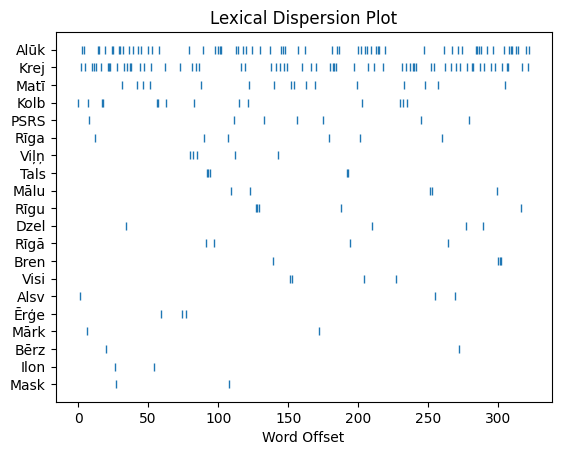

In [65]:
import pandas as pd
import nltk

def dispersion_plot(text, words, ignore_case=False, title="Lexical Dispersion Plot"):
    word2y = {
        word.casefold() if ignore_case else word: y
        for y, word in enumerate(words)
    }
    xs, ys = [], []
    for x, token in enumerate(text):
        token = token.casefold() if ignore_case else token
        y = word2y.get(token)
        if y is not None:
            xs.append(x)
            ys.append(y)

    _, ax = plt.subplots()
    ax.plot(xs, ys, "|")
    ax.set_yticks(list(range(len(words))))
    ax.set_yticklabels(words)
    ax.set_ylim(-1, len(words))
    ax.set_title(title)
    ax.set_xlabel("Word Offset")
    plt.show()  # Display the plot

input_csv = "test_all_entities.csv"
stemming_df = pd.read_csv(input_csv)

locations_test = []
for word in stemming_df.iloc[:, 0]:
    if pd.isna(word):
        continue  # Skip this word if it's NaN
    locations = str(word[:4])
    locations_test.append(locations)

locations_test_freq = nltk.FreqDist(locations_test)

common_loc = locations_test_freq.most_common(20)
list_of_interest = [word for word, freq in common_loc]
words_of_interest = list_of_interest[::-1]

dispersion_plot(locations_test, words_of_interest)


While the result seemed to be illustrative, it also shows the main problems with the extracted entities - the wrong attributions, for example. Similarly, it demonstrates the problems that stemming could not solve - the presence of the various morphological forms of the same entity.

Next, some tryouts of lemmatization followed. They did not play a significant role in the thesis.

In [13]:
import gzip

base_dir = os.path.dirname(os.path.abspath(__file__))

file_path = os.path.join(base_dir, "Data/lemmatization_dictionary_lv.dat.gz")

# Opening the gzip dictionary file
with gzip.open(file_path, 'rt', encoding='utf-8') as dictionary_file:
    lemmatization_dictionary = {}
    for line in dictionary_file:
        values = line.split('\t')
        lemmatization_dictionary[values[0]] = values[1][:-1]

In [14]:
def lemmatize_lv(word):
    if word in lemmatization_dictionary:
        return lemmatization_dictionary[word]
    else:
        return word

In [15]:
print('Rīga:', lemmatize_lv('Rīga'))
print('Kolberģi:', lemmatize_lv('Kolberģi'))

Rīga: Rīga
Kolberģi: Kolberģi


The preparations for the analysis of possible influence of gender factor on named entities frequencies meant that files have to be grouped. It was done semi-manually, in four groups - Male, Female, Collective and Other.

In [12]:
import csv
import pandas as pd

base_dir = os.path.dirname(os.path.abspath(__file__))

gender_metadata_file = os.path.join(base_dir, "NER-experiments/gender_cat.csv")

with open(gender_metadata_file, 'r', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    data = list(reader)

gender_df = pd.DataFrame(data)

grouped_data = gender_df.groupby('Category')

for category, group in grouped_data:
    print("Category:", category)
    category_statistics = group['Category'].value_counts()
    print(category_statistics)
    print("\n")


Category: Collective
Category
Collective    7
Name: count, dtype: int64


Category: Female
Category
Female    24
Name: count, dtype: int64


Category: Male
Category
Male    52
Name: count, dtype: int64


Category: Other
Category
Other    2
Name: count, dtype: int64




The final tests concerned the extraction and highligthing of named entities, and their saving in docx and excel files. This demanded heavy help from the AI tools.

In [22]:
! pip install python-docx

In [38]:
! pip install XlsxWriter

   ---------------------------------------- 0.0/159.9 kB ? eta -:--:--
   -- ------------------------------------- 10.2/159.9 kB ? eta -:--:--
   --------- ----------------------------- 41.0/159.9 kB 495.5 kB/s eta 0:00:01
   ---------------------------------------- 159.9/159.9 kB 1.4 MB/s eta 0:00:00


In [40]:
from transformers import pipeline
from docx import Document as DocxDocument
import docx.shared
import pandas as pd

# Initializing NER pipeline
pipeline_first = pipeline("ner", model=model, tokenizer=tokenizer, aggregation_strategy="first")

base_dir = os.path.dirname(os.path.abspath(__file__))

file_path = os.path.join(base_dir, "Data/Data/Corpus/1115688_Karla-Valguma-dienasgramatas.txt")

with open(file_path, "r", encoding="utf-8") as file:
    text_lines = file.readlines()

# Defining colors for each entity type
entity_colors = {
    "LOC": "75a65d",  # Light Green
    "PER": "0000FF",  # Blue
    "ORG": "FF0000"   # Red
}
doc = DocxDocument()

# Counters will help to understant if all entities are processed; for the final report this may not be necessary
entity_counters = {entity_type: 0 for entity_type in entity_colors.keys()}

# List to store entities; important for storing the data for manual work
entity_data = []

# Main loop to process text and colorize entities
for line in text_lines:
    paragraph = doc.add_paragraph()
    last_entity_end = 0  # Tracking of the end index of the last entity

    # Getting of the entities for the current line
    line_results = pipeline_first(line.strip())

    if line_results:
        for idx, entity in enumerate(line_results):
            entity_start_index = entity["start"]
            entity_end_index = entity["end"]
            entity_text = entity["word"]
            entity_type = entity["entity_group"]
            color = entity_colors.get(entity_type, "000000")  # Default color to black if not specified

            # Add non-entity text between entities
            non_entity_text = line[last_entity_end:entity_start_index]
            if non_entity_text:
                paragraph.add_run(non_entity_text + " ")

            # Adding the entity with colorization and bold font
            run = paragraph.add_run(entity_text)
            run.font.color.rgb = docx.shared.RGBColor(int(color[:2], 16),
                                                      int(color[2:4], 16),
                                                      int(color[4:], 16))
            run.bold = True  # Set bold font for entity

            # Adding entity type after entity in smaller font
            entity_type_run = paragraph.add_run(f" {entity_type.upper()}")
            entity_type_run.font.size = docx.shared.Pt(8)
            entity_type_run.font.bold = True

            # Update entity counters
            entity_counters[entity_type] += 1

            # Update last_entity_end index
            last_entity_end = entity_end_index

            # Appending entity data for the current line
            entity_data.append([entity_text, entity_type.upper(), "", ""])  # Added empty columns for Correct NE and Comment

            # Adding whitespace after entity type if it's not the last one in the line
            if idx < len(line_results) - 1:
                paragraph.add_run(" ")

        # Adding any remaining non-entity text after the last entity
        if last_entity_end < len(line):
            remaining_text = line[last_entity_end:]
            paragraph.add_run(remaining_text)
    else:
        paragraph.add_run(line)  # If no entities are found, line will be saved as it is

# Saving the document
output_file_path = "corpusfile_labeled.docx"
doc.save(output_file_path)
print("Output saved as 'corpusfile_labeled.docx'.")

# Converting entity data to DataFrame
df = pd.DataFrame(entity_data, columns=["NE", "Type", "Correct NE", "Comment"])  # Last two columns are for manual corrections

# Writing data to Excel file with XlsxWriter engine
output_excel_path = "entities_workfile.xlsx"
with pd.ExcelWriter(output_excel_path, engine='xlsxwriter') as writer:
    # Write data to first sheet
    df.to_excel(writer, index=False, sheet_name='Extracted Entities')
    
    # Second sheet with empty columns for manually identified NEs
    empty_df = pd.DataFrame(columns=["NE", "Type", "Comment"])  
    empty_df.to_excel(writer, index=False, sheet_name='Manual NEs')

print("Entity Counters:")
for entity_type, count in entity_counters.items():
    print(f"{entity_type}: {count}")

print(f"Entities saved to '{output_excel_path}' Excel file.")


Output saved as 'diary_labeled.docx'.
Entity Counters:
LOC: 323
PER: 717
ORG: 76
Entities saved to 'entities.xlsx' Excel file.


# References
* Adelani, D. (2021). Xlm-roberta-large-ner-hrl [Computer software]. https://huggingface.co/Davlan/xlm-roberta-large-ner-hrl

* ChatGPT 3.5. (October 2023). (2022). [Large Language Model]. Open AI. https://chat.openai.com/

* GitHub Copilot (1.7.4421). (2021). [Generative AI model]. GitHub. https://github.com/features/copilot/

* Jēkabsons, Gints (2023) Course materials from "Natural Language Processing". Riga Technical University.

* UDPipe. (n.d.). Retrieved 14 April 2024, from https://ufal.mff.cuni.cz/udpipe